In [3]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn



In [4]:

# Téléchargement WordNet
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...


True

## Exercice 1

In [5]:
nouns = ["cat", "mouse", "garden"]
verbs = ["chase"]

print("Noms :", nouns)
print("Verbes :", verbs)


Noms : ['cat', 'mouse', 'garden']
Verbes : ['chase']


In [6]:
synsets = {
    "cat": wn.synset("cat.n.01"),
    "mouse": wn.synset("mouse.n.01"),
    "garden": wn.synset("garden.n.01"),
    "chase": wn.synset("chase.v.01")
}

for word, syn in synsets.items():
    print(f"{word} → {syn.definition()}")


cat → feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
mouse → any of numerous small rodents typically resembling diminutive rats having pointed snouts and small ears on elongated bodies with slender usually hairless tails
garden → a plot of ground where plants are cultivated
chase → go after with the intent to catch


In [7]:
G = nx.DiGraph()

for word, syn in synsets.items():
    G.add_node(syn.name())

    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), label="is-a")

    for m in syn.part_meronyms():
        G.add_edge(syn.name(), m.name(), label="part-of")


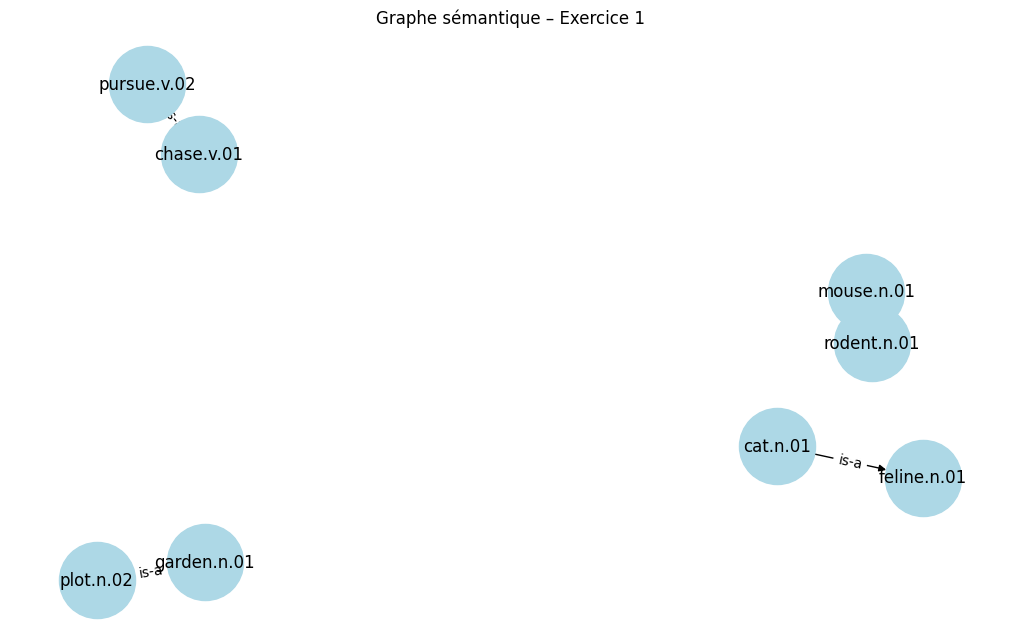

In [8]:
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graphe sémantique – Exercice 1")
plt.show()


## Exercice 2

In [9]:
nouns = ["chef", "meal", "guest"]
verbs = ["prepare", "serve"]

all_words = nouns + verbs

synsets = {w: wn.synsets(w)[0] for w in all_words}

for w, s in synsets.items():
    print(f"{w} → {s.definition()}")


chef → a professional cook
meal → the food served and eaten at one time
guest → a visitor to whom hospitality is extended
prepare → make ready or suitable or equip in advance for a particular purpose or for some use, event, etc
serve → (sports) a stroke that puts the ball in play


In [10]:
G = nx.DiGraph()

for word, syn in synsets.items():
    G.add_node(syn.name())

    # Synonymes
    for lemma in syn.lemmas():
        G.add_node(lemma.name())
        G.add_edge(lemma.name(), syn.name(), label="synonym")

    # Hyperonymes
    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), label="is-a")


In [11]:
G.add_edge(synsets["prepare"].name(), synsets["meal"].name(), label="action-on")
G.add_edge(synsets["serve"].name(), synsets["guest"].name(), label="recipient")


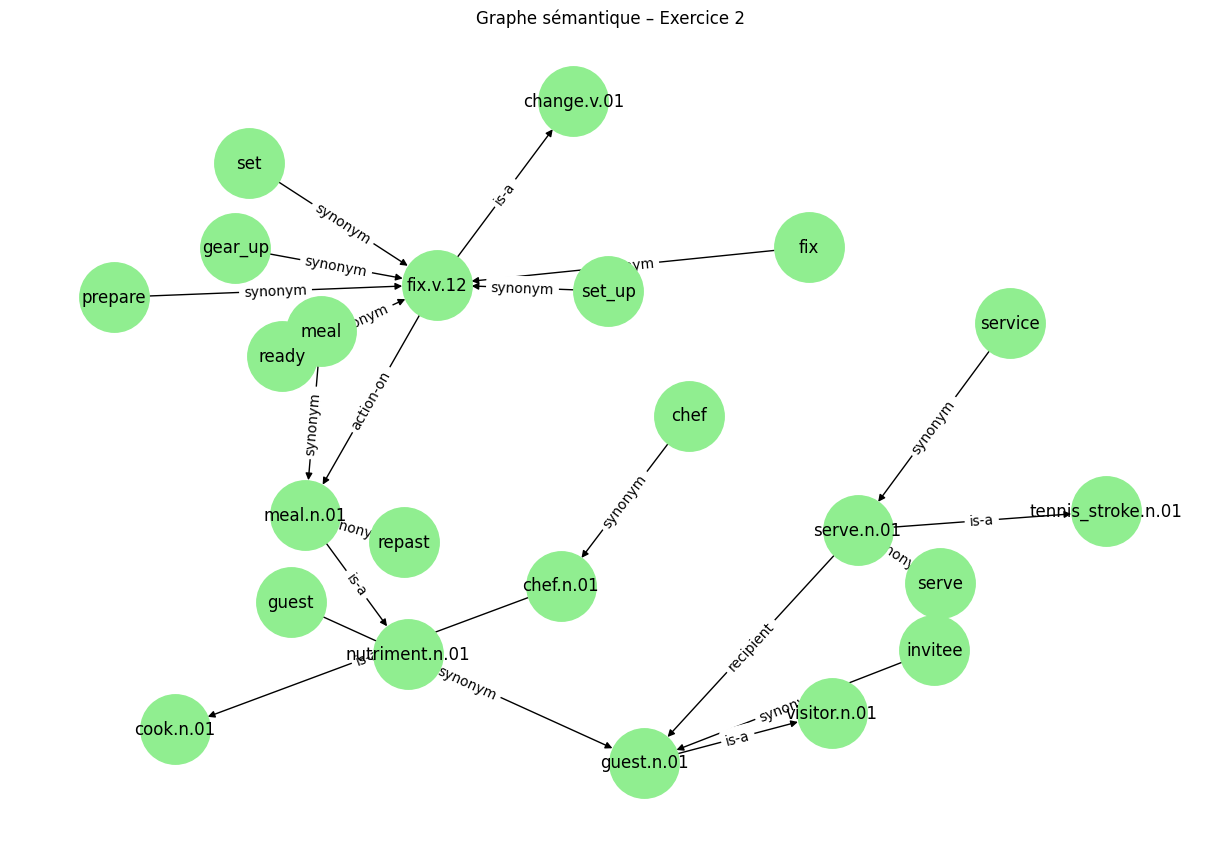

In [12]:
pos = nx.spring_layout(G, k=0.7)
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightgreen", node_size=2500)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graphe sémantique – Exercice 2")
plt.show()


## Exercice 3

In [13]:
nouns = ["laptop", "store", "report"]
verbs = ["buy", "use", "write"]

synsets = {w: wn.synsets(w)[0] for w in nouns + verbs}

for w, s in synsets.items():
    print(f"{w} → {s.definition()}")


laptop → a portable computer small enough to use in your lap
store → a mercantile establishment for the retail sale of goods or services
report → a written document describing the findings of some individual or group
buy → an advantageous purchase
use → the act of using
write → produce a literary work


In [14]:
G = nx.DiGraph()

for syn in synsets.values():
    G.add_node(syn.name())

    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), label="hypernym")

    for m in syn.part_meronyms():
        G.add_edge(syn.name(), m.name(), label="meronym")


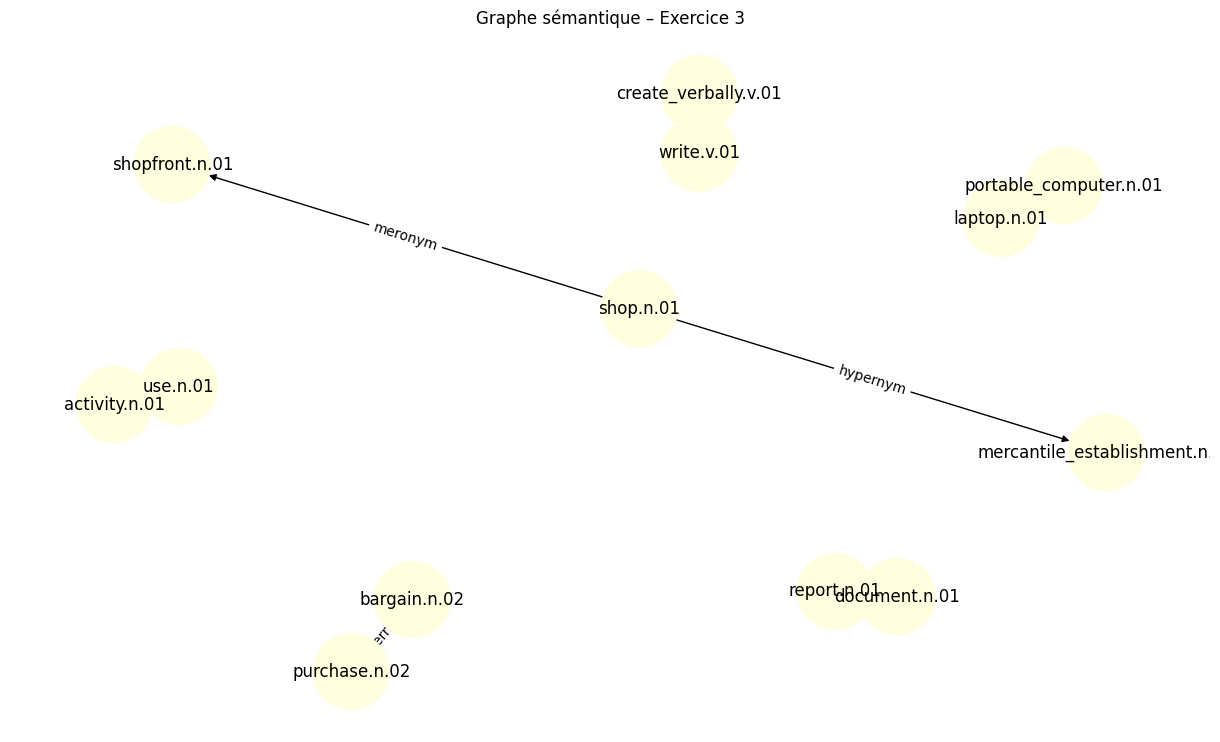

In [15]:
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(12, 7))
nx.draw(G, pos, with_labels=True, node_color="lightyellow", node_size=3000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graphe sémantique – Exercice 3")
plt.show()


## Exercice 4

In [16]:
words = [
    "vehicle", "car", "bus", "bicycle", "machine", "transport",
    "engine", "battery", "fuel", "passenger", "road", "airplane", "sky"
]

synsets = {w: wn.synsets(w)[0] for w in words}

for w, s in synsets.items():
    print(f"{w} → {s.definition()}")


vehicle → a conveyance that transports people or objects
car → a motor vehicle with four wheels; usually propelled by an internal combustion engine
bus → a vehicle carrying many passengers; used for public transport
bicycle → a wheeled vehicle that has two wheels and is moved by foot pedals
machine → any mechanical or electrical device that transmits or modifies energy to perform or assist in the performance of human tasks
transport → something that serves as a means of transportation
engine → motor that converts thermal energy to mechanical work
battery → group of guns or missile launchers operated together at one place
fuel → a substance that can be consumed to produce energy
passenger → a traveler riding in a vehicle (a boat or bus or car or plane or train etc) who is not operating it
road → an open way (generally public) for travel or transportation
airplane → an aircraft that has a fixed wing and is powered by propellers or jets
sky → the atmosphere and outer space as viewed from 

In [17]:
G = nx.DiGraph()

for word, syn in synsets.items():
    G.add_node(word)

    for h in syn.hypernyms():
        G.add_edge(word, h.lemmas()[0].name(), color="red")

    for hy in syn.hyponyms():
        G.add_edge(word, hy.lemmas()[0].name(), color="blue")

    for m in syn.part_meronyms():
        G.add_edge(word, m.lemmas()[0].name(), color="green")


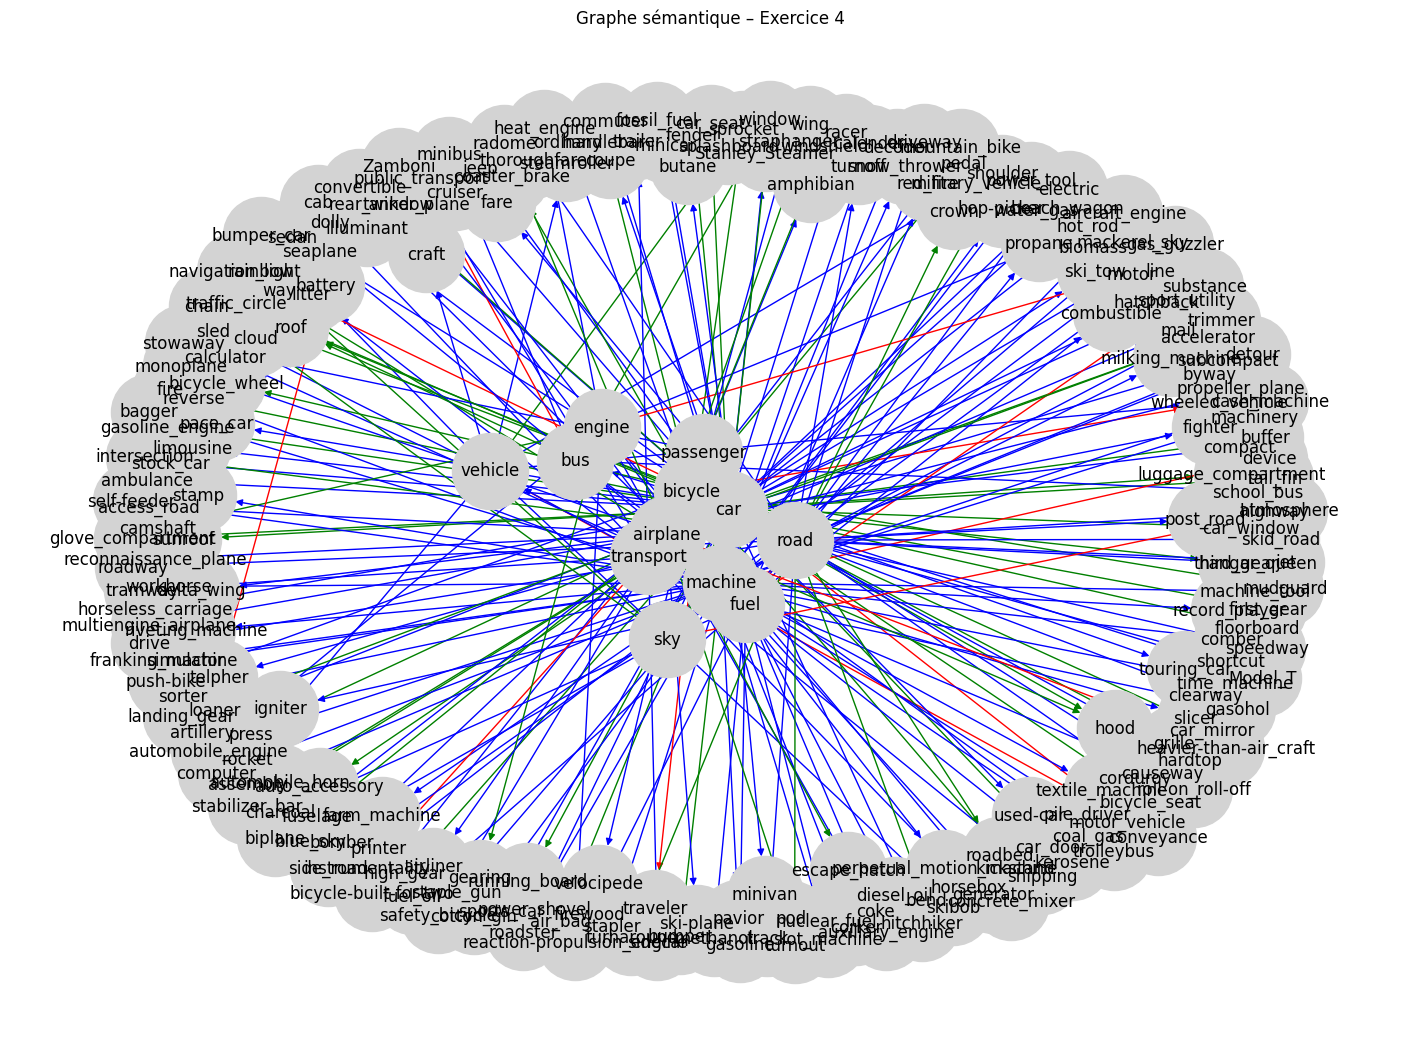

In [18]:
pos = nx.spring_layout(G, k=0.9)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]

plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, edge_color=colors, node_size=3000, node_color="lightgray")
plt.title("Graphe sémantique – Exercice 4")
plt.show()
